# Cat And Dog image Prediction using CNN


1.  Here, I have already cleaned data using for our operation
2.  CNN based on Keras Seq2seq model for images specailly we use here.
3.  i have trained 20 times and got an accuracy of nearly 92%. ohh preety good..!!




In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
X_data ="/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cat_dog_finalData/X.pickle"
Y_data = "/content/drive/My Drive/GPU_DeepLearningWork/DeepLearning_GPU_Work/cat_dog_finalData/y.pickle"

In [0]:
import pickle
X_features = pickle.load(open(X_data,"rb"))
Y_lables = pickle.load(open(Y_data,"rb"))

In [0]:
X_features.shape,Y_lables.shape

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

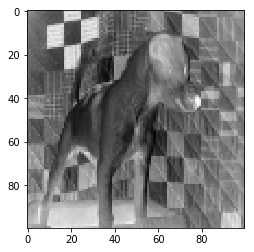

In [0]:
plt.imshow(np.squeeze(X_features[10]),cmap="binary")
plt.show()

In [0]:
Y_lables[10]  # yeah its allright we correctly mixed lables respact to image  of cat(0) and dog(1).

1

In [0]:
# here we just normalize the data for faster calculation 
X_features = X_features / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPool2D,Dropout,Flatten

In [0]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
sess = tf.Session(config = tf.ConfigProto(gpu_options=gpu_options))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=X_features.shape[1:], activation='relu'))
model.add(Convolution2D(32,(3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3),  activation='relu'))
model.add(Convolution2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Convolution2D(128,(3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Convolution2D(256, (3, 3),  activation='relu'))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss="binary_crossentropy",optimizer="RMSprop",metrics=['accuracy'])
model.fit(X_features,Y_lables,batch_size=64,epochs=20,validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/20
17462/17462 [==============================] - 606s 35ms/sample - loss: 0.6944 - acc: 0.4999 - val_loss: 0.6930 - val_acc: 0.5073
Epoch 2/20
17462/17462 [==============================] - 604s 35ms/sample - loss: 0.6936 - acc: 0.4960 - val_loss: 0.6932 - val_acc: 0.4927
Epoch 3/20
17462/17462 [==============================] - 606s 35ms/sample - loss: 0.6943 - acc: 0.4960 - val_loss: 0.6943 - val_acc: 0.4927
Epoch 4/20
17462/17462 [==============================] - 606s 35ms/sample - loss: 0.6919 - acc: 0.5085 - val_loss: 0.6939 - val_acc: 0.5267
Epoch 5/20
17462/17462 [==============================] - 604s 35ms/sample - loss: 0.6768 - acc: 0.5804 - val_loss: 0.6463 - val_acc: 0.6446
Epoch 6/20
17462/17462 [==============================] - 609s 35ms/sample - loss: 0.6380 - acc: 0.6453 - val_loss: 0.6000 - val_acc: 0.6840
Epoch 7/20
17462/17462 [==============================] - 608s 35ms/sample - loss: 0.5897 - acc: 0.6980 -

In [13]:
predict = model.predict([X_features])
predict, predict.shape

(array([[0.0000000e+00],
        [4.8775306e-01],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [1.7512264e-04],
        [2.1698135e-03]], dtype=float32), (24946, 1))

In [19]:
np.argmax(predict[222])

0

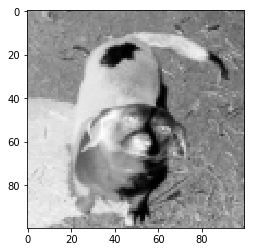

In [20]:
plt.imshow(np.squeeze(X_features[222]),cmap="binary")
plt.show()